<a href="https://colab.research.google.com/github/abhishekshakya/stock-price-predictitons-using-pytorch-LSTM/blob/master/Stock.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

In [2]:
dfx = pd.read_csv('x_train.csv')
dfy = pd.read_csv('x_test.csv')
print(dfx.shape,dfy.shape)

(1257, 1) (19, 1)


In [3]:
df = pd.concat([dfx,dfy])
x = df.values

In [4]:
#normalizing the data
scale = MinMaxScaler((0,1))
x = scale.fit_transform(x)

In [5]:
x_new = []
y_new = []
for i in range(60,x.shape[0]):
    x_new.append(x[i-60:i,0])
    y_new.append(x[i,0])

x_new = np.array(x_new)
y_new = np.array(y_new)

In [6]:
SPLIT = 0.1
div = int(x_new.shape[0]*SPLIT)
print(div)

121


In [7]:
x_train = x_new[:-div]
y_train = y_new[:-div]

x_test = x_new[-div:]
y_test = y_new[-div:]

print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(1095, 60) (121, 60) (1095,) (121,)


In [8]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [9]:
input_dim = 60
hidden_dim = 64

class myLSTM(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.l1 = nn.LSTM(input_dim,hidden_dim,batch_first=True,num_layers=1)
        self.fc1 = nn.Linear(hidden_dim,1)
    
    def forward(self,x):
        x = x.reshape(-1,1,input_dim)
        # print(x.shape)
        x,(hidden_state,cell_state) = self.l1(x)
        # print(hidden_state.shape)
        x = hidden_state[-1].reshape(-1,hidden_dim)
        x = self.fc1(x)

        return x

        
        
        

In [10]:
device =  torch.device("cuda" if torch.cuda.is_available() else 'cpu')

In [11]:
device

device(type='cuda')

In [34]:
model = myLSTM()
lass = nn.MSELoss()
optimizer = optim.Adam(model.parameters(),lr=0.0001)

In [35]:
print(model)

myLSTM(
  (l1): LSTM(60, 64, batch_first=True)
  (fc1): Linear(in_features=64, out_features=1, bias=True)
)


In [36]:
model.to(device)

myLSTM(
  (l1): LSTM(60, 64, batch_first=True)
  (fc1): Linear(in_features=64, out_features=1, bias=True)
)

In [37]:
def training(x_train,y_train,x_test,y_test,epochs=250):
    model.train()
    x_train = torch.from_numpy(x_train).float().to(device)
    y_train = torch.from_numpy(y_train).float().to(device)
    x_test = torch.from_numpy(x_test).float().to(device)
    y_test = torch.from_numpy(y_test).float().to(device)
    training_loss = []
    val_loss = []
    

    for epoch in tqdm(range(epochs)):
            optimizer.zero_grad()

            with torch.no_grad():
              pred = model(x_test)
              val_l = lass(pred.reshape(-1),y_test)
              val_loss.append(val_l)

            out = model(x_train)
            out = out.reshape(-1)
            loss = lass(out,y_train)
            loss.backward()
            optimizer.step()

            training_loss.append(loss.item())
            if epoch%5==0:
                print(f"epoch {epoch} loss => {loss.item()}")
    
    return training_loss,val_loss
        
            

In [38]:
train,val = training(x_train,y_train,x_test,y_test)

 24%|██▎       | 59/250 [00:00<00:00, 295.00it/s]

epoch 0 loss => 0.17555572092533112
epoch 5 loss => 0.16103139519691467
epoch 10 loss => 0.1471569538116455
epoch 15 loss => 0.13394546508789062
epoch 20 loss => 0.12141039222478867
epoch 25 loss => 0.10955865681171417
epoch 30 loss => 0.0983903780579567
epoch 35 loss => 0.08790265023708344
epoch 40 loss => 0.07809251546859741
epoch 45 loss => 0.06895826756954193
epoch 50 loss => 0.06049925833940506
epoch 55 loss => 0.052715107798576355


 48%|████▊     | 121/250 [00:00<00:00, 300.54it/s]

epoch 60 loss => 0.04560451954603195
epoch 65 loss => 0.03916404768824577
epoch 70 loss => 0.03338663652539253
epoch 75 loss => 0.02826031483709812
epoch 80 loss => 0.023767074570059776
epoch 85 loss => 0.01988205499947071
epoch 90 loss => 0.01657320372760296
epoch 95 loss => 0.01380140520632267
epoch 100 loss => 0.011521212756633759
epoch 105 loss => 0.009682059288024902
epoch 110 loss => 0.008229944854974747
epoch 115 loss => 0.007109415251761675
epoch 120 loss => 0.006265683565288782


 73%|███████▎  | 182/250 [00:00<00:00, 301.80it/s]

epoch 125 loss => 0.005646642297506332
epoch 130 loss => 0.005204618908464909
epoch 135 loss => 0.004897675476968288
epoch 140 loss => 0.004690358880907297
epoch 145 loss => 0.0045539019629359245
epoch 150 loss => 0.0044659157283604145
epoch 155 loss => 0.00440971227362752
epoch 160 loss => 0.004373406525701284
epoch 165 loss => 0.004348918795585632
epoch 170 loss => 0.004331030882894993
epoch 175 loss => 0.004316556733101606
epoch 180 loss => 0.0043036723509430885
epoch 185 loss => 0.004291414283216


100%|██████████| 250/250 [00:00<00:00, 299.20it/s]

epoch 190 loss => 0.004279322922229767
epoch 195 loss => 0.0042672171257436275
epoch 200 loss => 0.004255047533661127
epoch 205 loss => 0.004242821130901575
epoch 210 loss => 0.0042305588722229
epoch 215 loss => 0.004218281712383032
epoch 220 loss => 0.004206004086881876
epoch 225 loss => 0.004193735308945179
epoch 230 loss => 0.004181480035185814
epoch 235 loss => 0.004169239196926355
epoch 240 loss => 0.004157016519457102
epoch 245 loss => 0.0041448138654232025


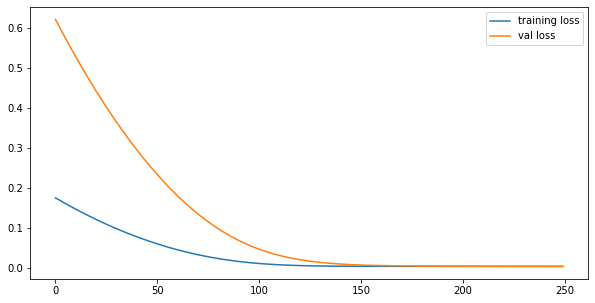

In [39]:
plt.figure(figsize=(10,5))
plt.plot(train,label='training loss')
plt.plot(val,label='val loss')
plt.legend()
plt.show()

In [40]:
print(type(x_train))

<class 'numpy.ndarray'>


In [41]:
def accuracy(X_test,Y_test):
  x_test = torch.from_numpy(X_test).float().to(device)
  y_test = torch.from_numpy(Y_test).float().to(device)
  model.eval()
  y_pred = model(x_test)
  # print(y_test.shape,y_pred.shape)
  return r2_score(y_test.cpu().detach(),y_pred.reshape(-1).cpu().detach()),y_pred

In [42]:
acc,y_pred = accuracy(x_train,y_train)
print(acc)

0.9286692411325349


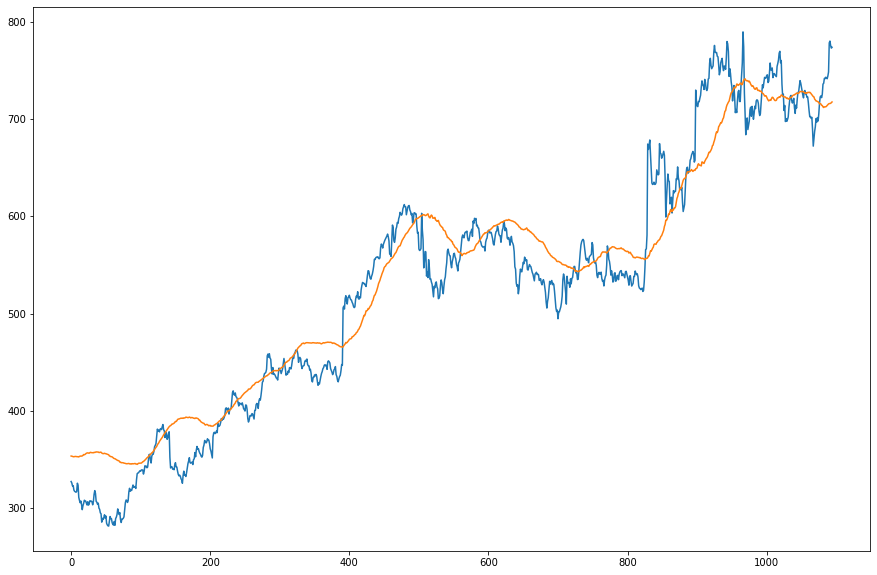

In [43]:
plt.figure(figsize=(15,10))
plt.plot(scale.inverse_transform(y_train.reshape(-1,1)))
plt.plot(scale.inverse_transform(y_pred.cpu().detach().reshape(-1,1)))